Class: DSC 670<br>
Name: Eros Perez<br>
Week: 4<br>
Problem: Stable Diffusion<br>

### Generate Image
This block of code will use stabilityAI stable diffusion model to create an image

In [32]:
import base64
import os
import requests
import datetime
import re

engine_id = "stable-diffusion-xl-1024-v1-0"
api_host = "https://api.stability.ai"
api_key = os.getenv("STABILITY_API_KEY")

# prompt = "A lighthouse on a cliff"
prompt = """A raw amateur phone photo shot on iPhone (but the iPhone is not visible in the image). 
The photo shows a 25-year-old young white Hispanic woman posing casually in front of the Eiffel Tower. 
She looks naturally pretty, with minimal makeup, slightly wavy light brown hair, and a relaxed, lighthearted expression. 
She’s wearing normal modern clothes: a fitted crop top and high-waisted jeans. 
One leg is slightly bent and one hand rests on her hip, in a typical tourist pose. 
The photo is taken around midday, under strong sunlight with harsh natural shadows. 
The background clearly shows Eiffel Tower and its surroundings — it must look realistic and natural, 
with some tourists and street details, but nothing too edited or cinematic. 
The entire image should have the vibe of a spontaneous everyday photo, slightly overexposed, shaky, mediocre quality, 
like a real unfiltered iPhone snapshot. The lighting is real, no bokeh, no post-processing. UGC style, 
similar to a Snapchat story from summer 2023."""
# prompt = "A panda surfing on a wave"

if api_key is None:
    raise Exception("Missing Stability API key.")

# Set the directory where we'll store the image
image_dir = "/Users/erosperez/Documents/python_notebooks/DSC670 - GenAI/API_AI_Photos"

# Make sure the directory exists
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# Function to clean up filenames
def valid_filename(s):                                      
    s = re.sub(r'[^\w_.)( -]', '', s).strip()
    return re.sub(r'[\s]+', '_', s)

response = requests.post(
    f"{api_host}/v1/generation/{engine_id}/text-to-image",
    headers={
        "Content-Type": "application/json",
        "Accept": "application/json",
        "Authorization": f"Bearer {api_key}"
    },
    json={
        "text_prompts": [
            {
                "text": f"{prompt}",
            }
        ],
        "cfg_scale": 7, #This tells prompt how closely to follow the prompt. Values betweeen 0 and 35. High value keeps closer to prompt
        "height": 1024,
        "width": 1024,
        "samples": 1, #This tells the number of images to create between 1 and 10
        "steps": 50, #Number of steps to run between 10 and 150
        #"stye_preset":"cinematic" #this guiades the image toward a particular style
    },
)

if response.status_code != 200:
    raise Exception("Non-200 response: " + str(response.text))

data = response.json()

for i, image in enumerate(data["artifacts"]):
    filename_1 = "gen_ai_1.png"
    image_path = os.path.join(image_dir, filename_1)
    with open(image_path, "wb") as f:
        f.write(base64.b64decode(image["base64"]))

### Edit the Image 
In the following block of code, we will take the image from the last prompt and edit it

In [38]:
import base64
import os
import requests
import datetime
import re

engine_id = "stable-diffusion-xl-1024-v1-0"
api_host = "https://api.stability.ai"
api_key = os.getenv("STABILITY_API_KEY")

orginal_image = "/Users/erosperez/Documents/python_notebooks/DSC670 - GenAI/API_AI_Photos/" + filename_1

# Set the directory where we'll store the image
image_dir = "/Users/erosperez/Documents/python_notebooks/DSC670 - GenAI/API_AI_Photos"

# Make sure the directory exists
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# Function to clean up filenames
def valid_filename(s):
    s = re.sub(r'[^\w_.)( -]', '', s).strip()
    return re.sub(r'[\s]+', '_', s)

if api_key is None:
    raise Exception("Missing Stability API key.")

response = requests.post(
    f"{api_host}/v1/generation/{engine_id}/image-to-image",
    headers={
        "Accept": "application/json",
        "Authorization": f"Bearer {api_key}"
    },
    files={
        "init_image": open(orginal_image, "rb")
    },
    data={
        "image_strength": 0.25,
        "init_image_mode": "IMAGE_STRENGTH",
        "text_prompts[0][text]": """A raw amateur phone photo shot on iPhone (but the iPhone is not visible in the image). 
                The photo shows a 40-year-old young white Hispanic woman posing casually in front of the Eiffel Tower. 
                She looks naturally pretty, with minimal makeup, slightly wavy light brown hair, and a relaxed, lighthearted expression. 
                She’s wearing normal modern clothes: a fitted crop top and high-waisted jeans. 
                One leg is slightly bent and one hand rests on her hip, in a typical tourist pose. 
                The photo is taken around midday, under strong sunlight with harsh natural shadows. 
                The background clearly shows Eiffel Tower and its surroundings — it must look realistic and natural, 
                with some tourists and street details, but nothing too edited or cinematic. 
                The entire image should have the vibe of a spontaneous everyday photo, slightly overexposed, shaky, mediocre quality, 
                like a real unfiltered iPhone snapshot. The lighting is real, no bokeh, no post-processing. UGC style, 
                similar to a Snapchat story from summer 2023.""",
        "cfg_scale": 7,
        "samples": 1,
        "steps": 50,
        "sampler": "K_DPMPP_2M"
    }
)

if response.status_code != 200:
    raise Exception("Non-200 response: " + str(response.text))

data = response.json()

for i, image in enumerate(data["artifacts"]):
    filename = "gen_ai_1_edited.png"
    image_path = os.path.join(image_dir, filename)
    
    with open(image_path, "wb") as f:
        f.write(base64.b64decode(image["base64"]))

### First Image Generated

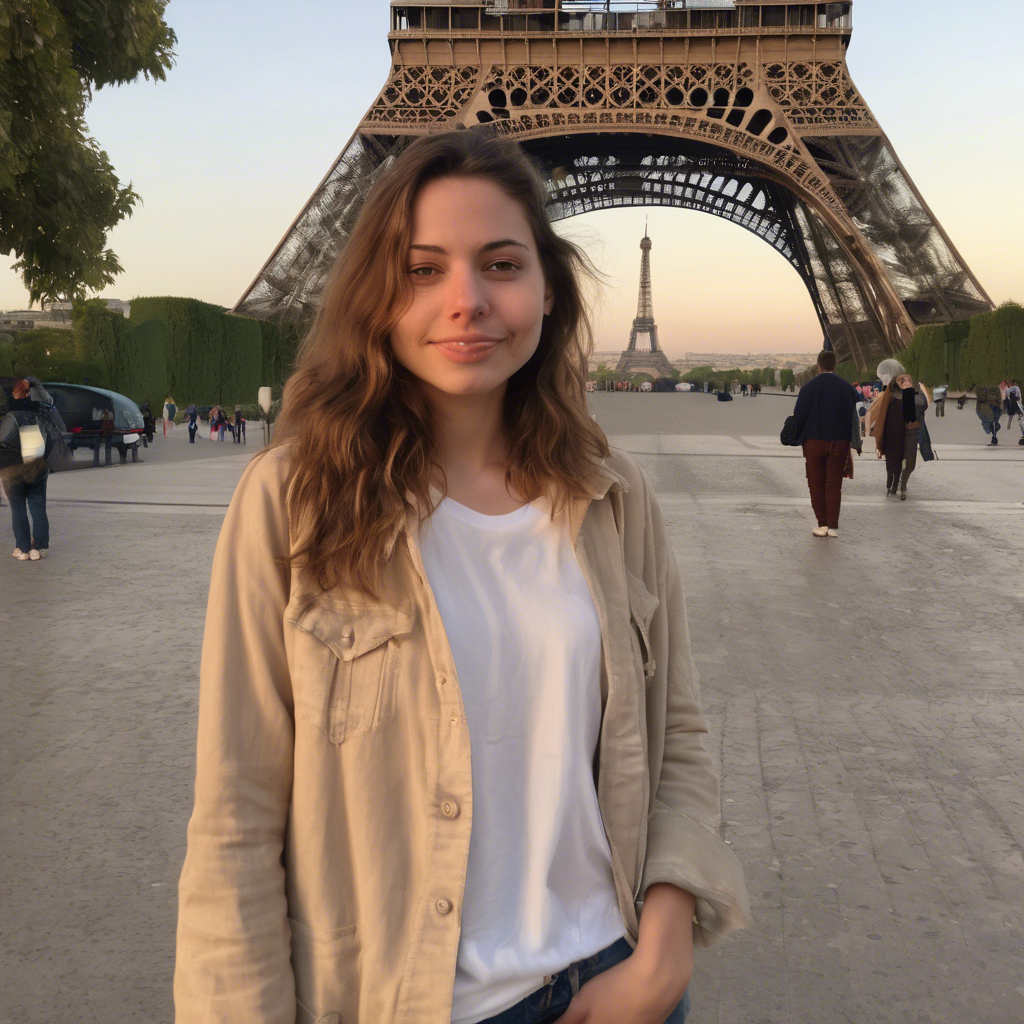

In [45]:
from IPython.display import Image, display

image_path = "/Users/erosperez/Documents/python_notebooks/DSC670 - GenAI/API_AI_Photos/gen_ai_1.png"
display(Image(filename=image_path))

### Second image generated when editing the original one 
In the second image, all i changed was the age from 25 to 40

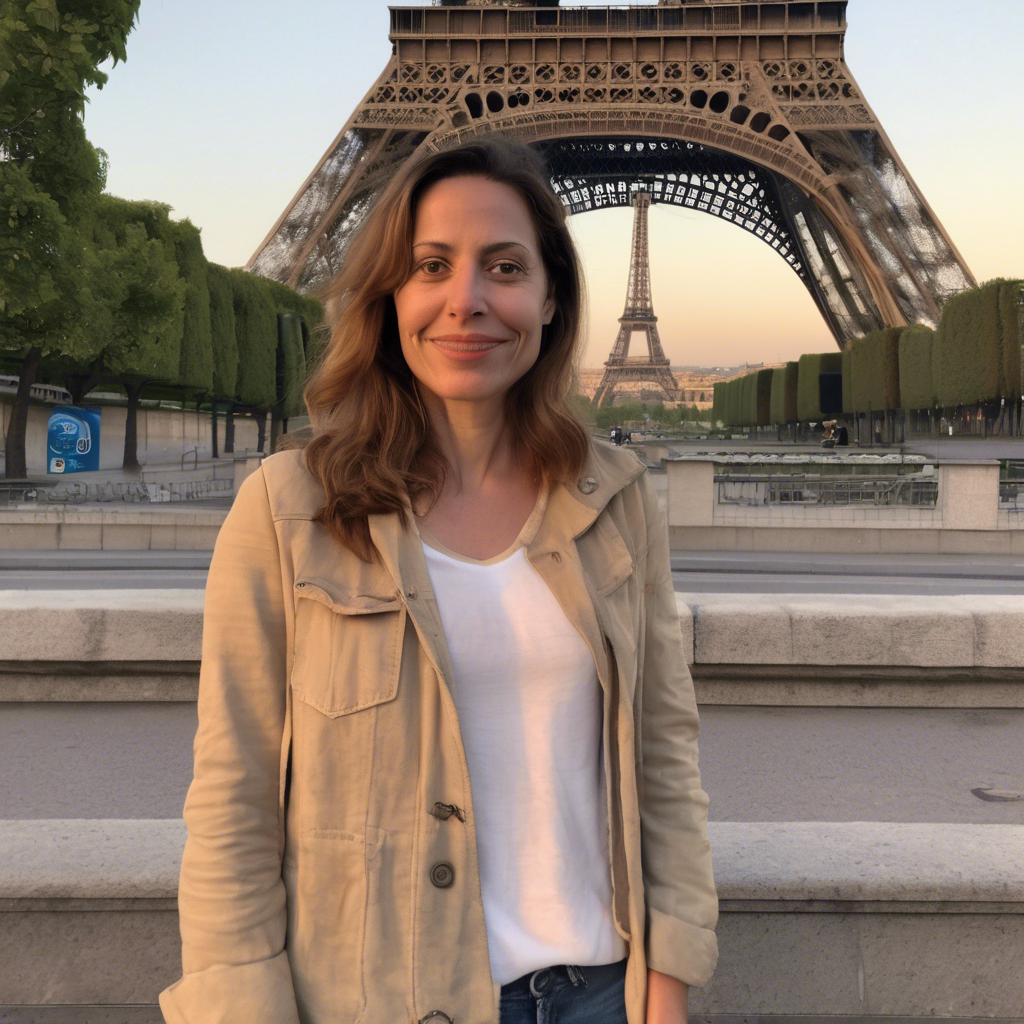

In [49]:
image_path = "/Users/erosperez/Documents/python_notebooks/DSC670 - GenAI/API_AI_Photos/gen_ai_1_edited.png"
display(Image(filename=image_path))

### Evaluation

For this part of the assignment, I used the same prompt as I did when comparing Sora's image with OpenArt. It is really cool that I can generate images in python and fine tune it using the parameters available from StabilityAI. One thing I noticed is that this GAI, with the current parameters (got them from out textbook) did not create very good realistic images. The first image does a good job of creating a girl around her mid twenties, however, her face symmetry in the eyes is not correct. In addition, her lip looks oddly large. In terms of the tower in the back, their is two Eiffel Towers in the image. Finally, the people in the background look very odd, almost like if picasso drew them and the bushes are not accurate either.

When it came to editing the image, I thought it did a pretty good job of making adjustments to the original image, although the mouth because creepier and so did the eyes. Overall, I may need to use a different model from stability to create highly realistic images. However, when it came to simple images like the panda from the example, it did a very good job. 